<a href="https://colab.research.google.com/github/Manjunath3304/Python-Project/blob/main/Sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/googleplaystore.csv')

In [3]:
#head of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#last rows of dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'missing values percentage in data set')

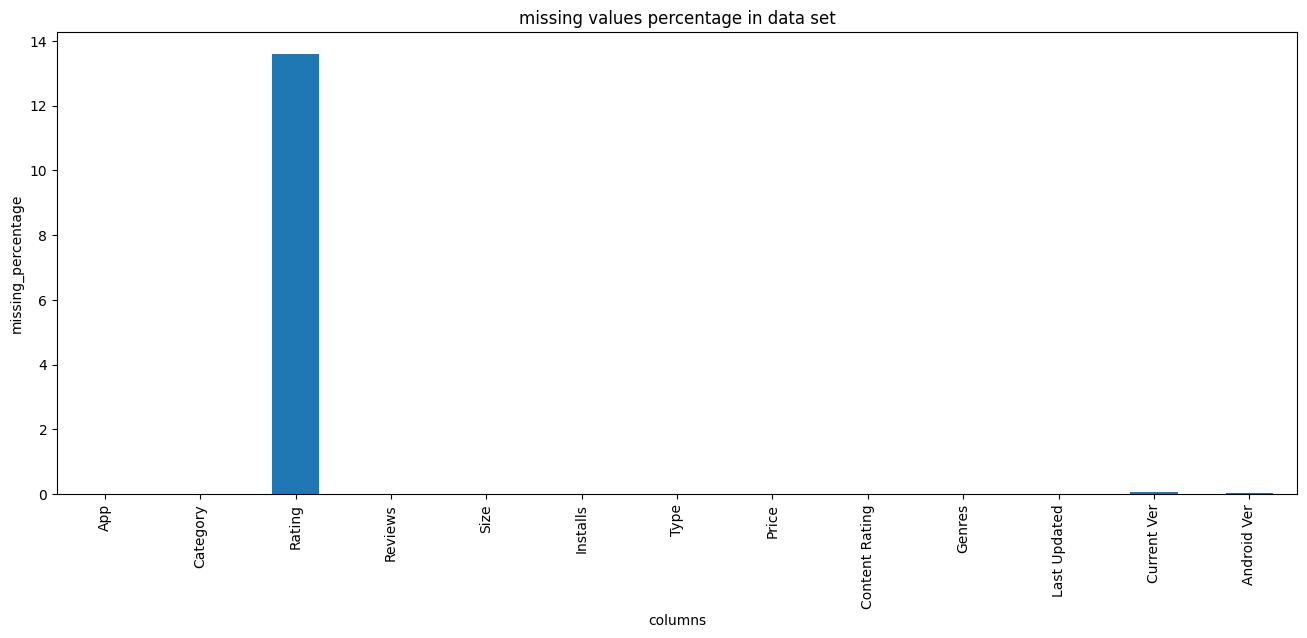

In [6]:
# make figsize plot
plt.figure(figsize=(16,6))
# plot the missing values percentage
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('columns')
plt.ylabel('missing_percentage')
plt.title('missing values percentage in data set')

This plot offers a quick overview of the extent of missing data across different columns, aiding in identifying columns with high proportions of missing values, which may require further investigation or handling during data preprocessing.

<ipython-input-7-87c8eb46f429>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='viridis')


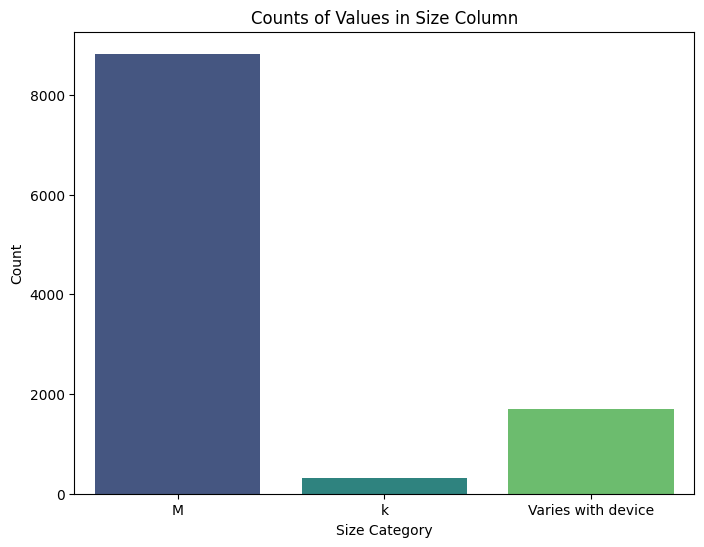

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Counts of values containing 'M'
m_counts = df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

# Counts of values containing 'k'
k_counts = df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

# Counts of values containing 'Varies with device'
varies_counts = df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

# Visualize the counts
sizes = [m_counts, k_counts, varies_counts]
labels = ['M', 'k', 'Varies with device']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sizes, palette='viridis')
plt.title('Counts of Values in Size Column')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()


In [8]:
def convert_installs(installs):
    if isinstance(installs, str):
        if '+' in installs:
            return int(installs.replace('+', '').replace(',', ''))
        elif ',' in installs:
            return int(installs.replace(',', ''))
        elif 'Free' in installs:
            return 0
    return installs

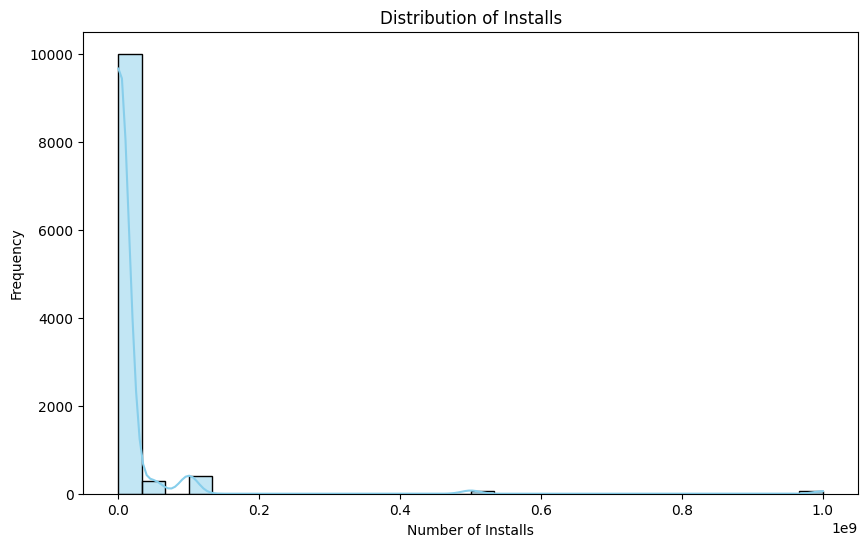

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and the conversion function is defined

# Apply the conversion function to 'Installs' column
df['Installs'] = df['Installs'].apply(convert_installs)

# Convert the 'Installs' column to integers
df['Installs'] = pd.to_numeric(df['Installs'])

# Visualize the distribution of 'Installs'
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()


The histogram reveals how app installs are distributed across various install count ranges, offering insights into the popularity and usage levels of apps.

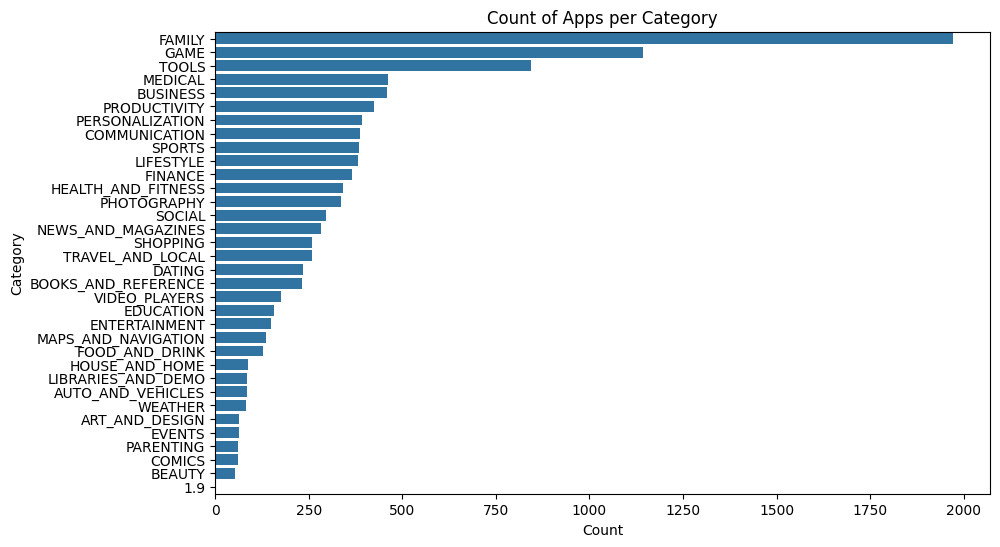

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index)
plt.title('Count of Apps per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


Insights the distribution of apps across different categories, highlighting the most prevalent categories in the dataset.

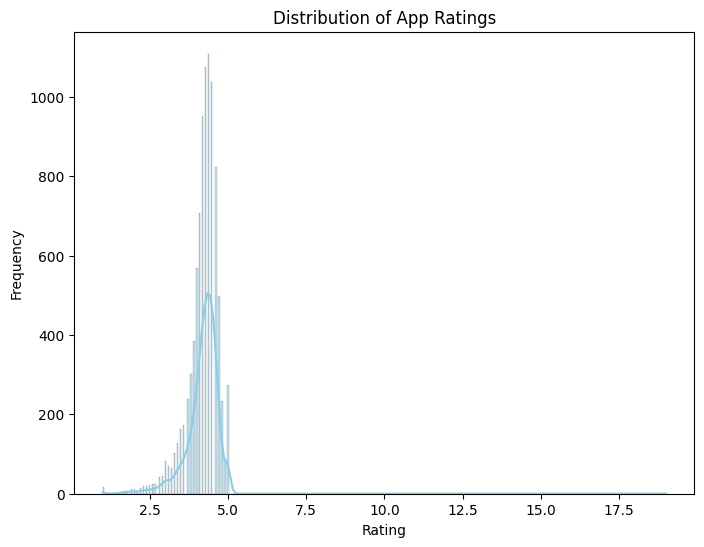

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of app ratings, indicating the concentration of ratings around certain values and the overall trend in app ratings.

<ipython-input-12-49b006f333da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='App', data=top_10_reviews, palette='viridis')


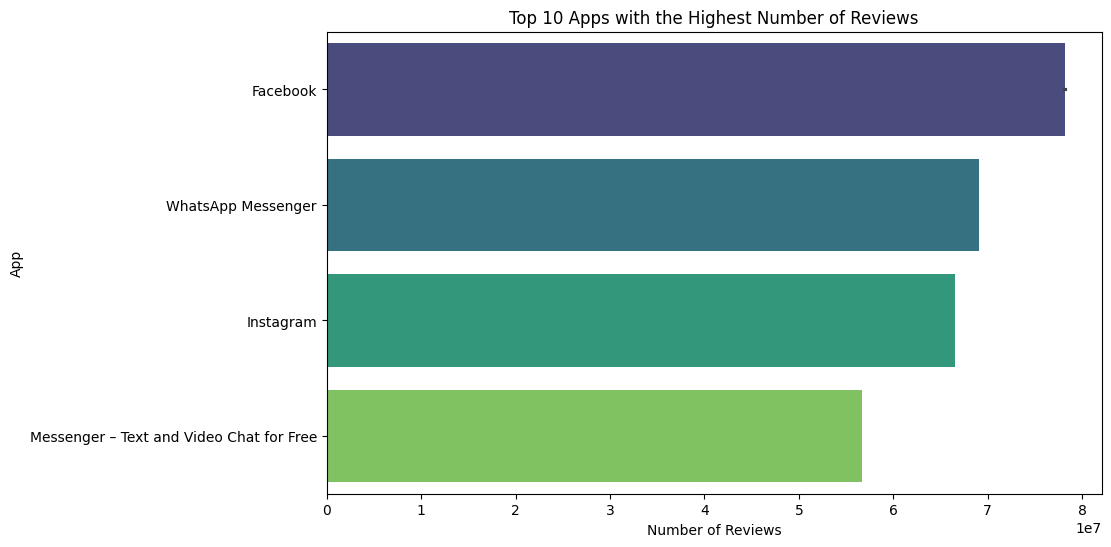

In [12]:
# Convert 'Reviews' column to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Now you can find the top 10 apps with the highest number of reviews
top_10_reviews = df.nlargest(10, 'Reviews')

# Visualize the top 10 apps with the highest number of reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='App', data=top_10_reviews, palette='viridis')
plt.title('Top 10 Apps with the Highest Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()



Identifies the most reviewed apps, indicating their popularity and potential impact on user engagement.

<ipython-input-13-f742126339db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content Rating', data=df, palette='Set2')


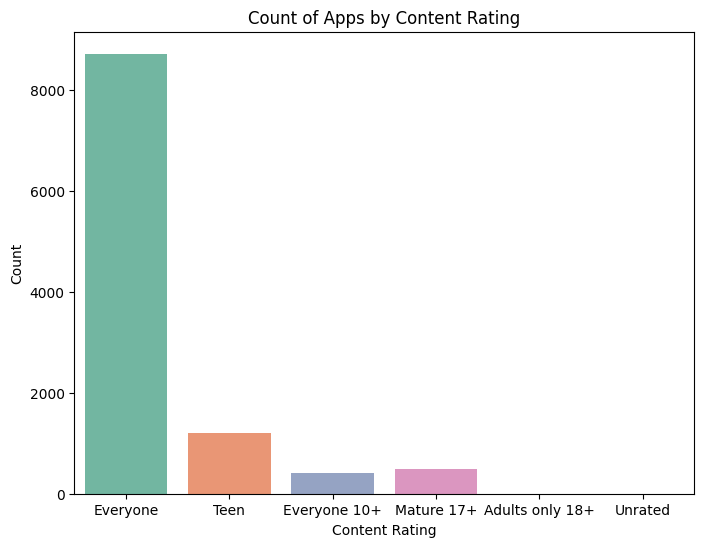

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Content Rating', data=df, palette='Set2')
plt.title('Count of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


Gives an understanding of the distribution of apps based on their content rating, highlighting the target audience for most apps.

<ipython-input-14-5bc9c200c6c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Varies with Device'], y=[varies_with_device_count], palette='viridis')


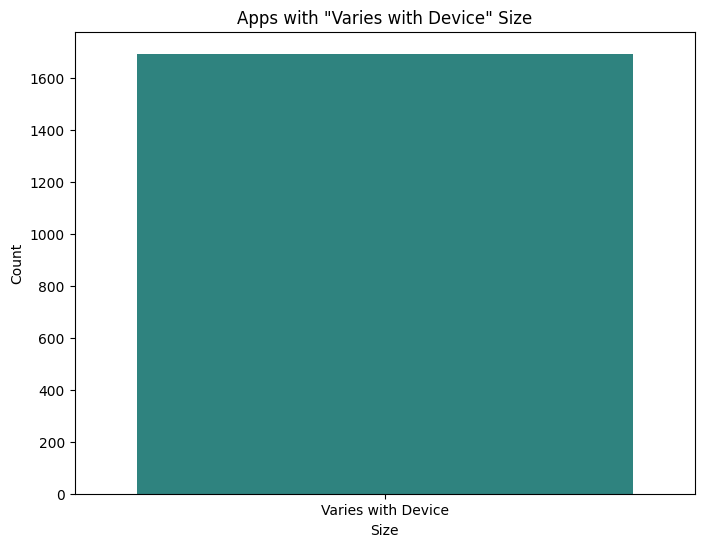

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of apps with 'Varies with Device' size
varies_with_device_count = df[df['Size'] == 'Varies with device'].shape[0]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Varies with Device'], y=[varies_with_device_count], palette='viridis')
plt.title('Apps with "Varies with Device" Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()


The visualization simply shows the count of apps with sizes that vary depending on the device.

<ipython-input-15-e4c3dffa6691>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=free_everyone_apps, order = free_everyone_apps['Category'].value_counts().index, palette='pastel')


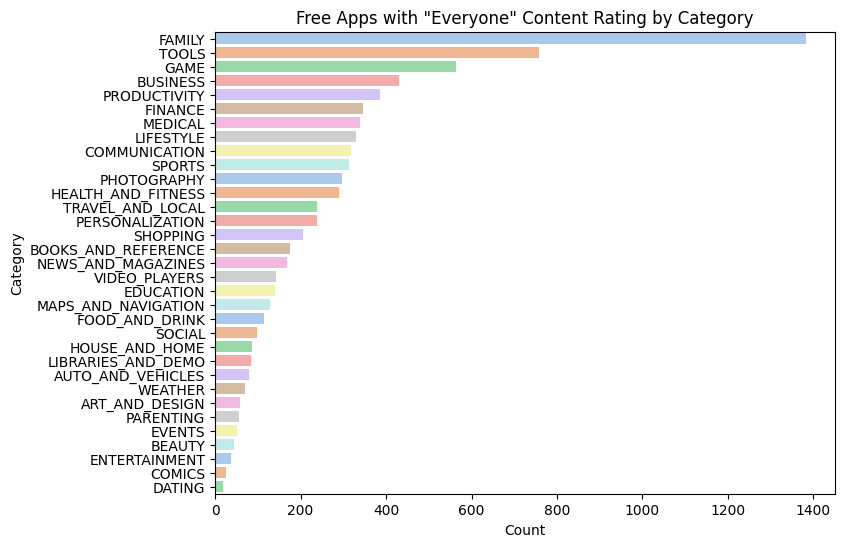

In [15]:
free_everyone_apps = df[(df['Type'] == 'Free') & (df['Content Rating'] == 'Everyone')]
plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=free_everyone_apps, order = free_everyone_apps['Category'].value_counts().index, palette='pastel')
plt.title('Free Apps with "Everyone" Content Rating by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


Shows the distribution of free apps suitable for all age groups across different categories, indicating popular categories for family-friendly apps.

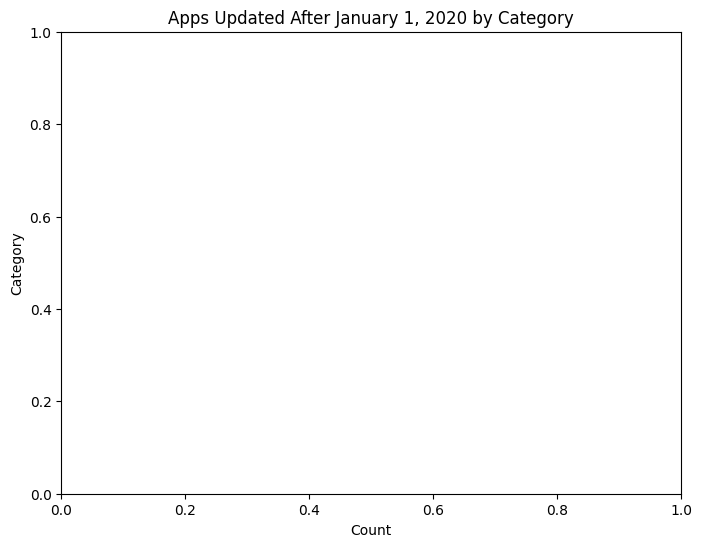

In [16]:
import pandas as pd

# Convert 'Last Updated' column to datetime, handling errors
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows with NaT (not a time) values, if any
df = df.dropna(subset=['Last Updated'])

# Filter recent apps updated after January 1, 2020
recent_apps = df[df['Last Updated'] > '2020-01-01']

# Plot the count of apps updated after January 1, 2020 by category
plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=recent_apps, order=recent_apps['Category'].value_counts().index, palette='dark')
plt.title('Apps Updated After January 1, 2020 by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()



Indicates the recent activity in app updates across different categories, providing insights into which categories are actively maintaining their apps.

<ipython-input-17-73b02c934a55>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Paid Apps'], y=[paid_apps_count], palette='Set2')


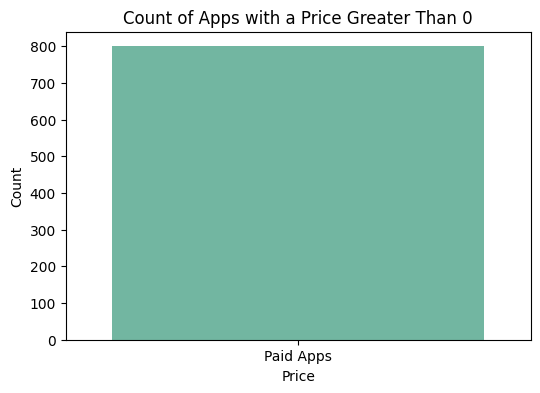

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of apps with a price greater than 0
paid_apps_count = df[df['Price'] != '0'].shape[0]

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=['Paid Apps'], y=[paid_apps_count], palette='Set2')
plt.title('Count of Apps with a Price Greater Than 0')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()



The visualization simply confirms the existence of paid apps in the dataset, providing clarity on the number of apps that require payment.

<ipython-input-18-f9c9526feaab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genres', data=df, order = df['Genres'].value_counts().index, palette='muted')


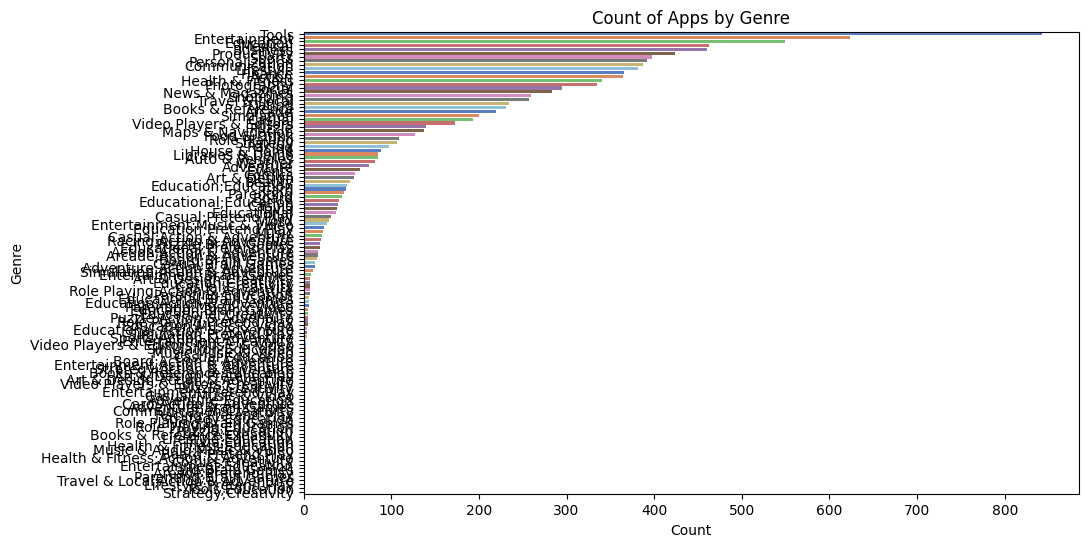

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Genres', data=df, order = df['Genres'].value_counts().index, palette='muted')
plt.title('Count of Apps by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


Provides insights into the diversity of app genres available in the dataset and highlights the most common genres.

<ipython-input-19-8a0ce657f37c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Missing Current Version'], y=[missing_current_ver_count], palette='muted')


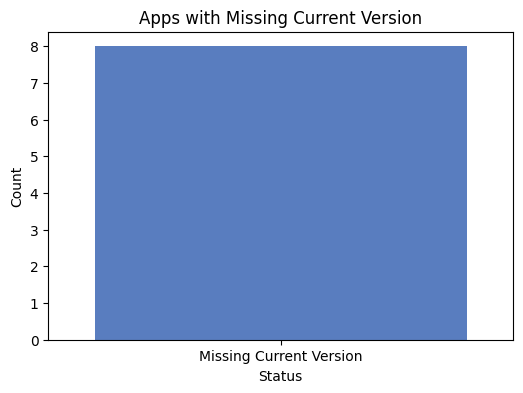

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of apps with missing current version
missing_current_ver_count = df['Current Ver'].isnull().sum()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=['Missing Current Version'], y=[missing_current_ver_count], palette='muted')
plt.title('Apps with Missing Current Version')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



Identifies apps with missing current version information, which could require further investigation or updates for completeness.